# TP 3 - Tri par insertion

## Généralités

Un algorithme de tri est jugé sur deux critères : sa complexité et la stabilité.

### Complexité d'un algorithme

La complexité d'un algorithme mesure le nombre d'opérations (complexité temporelle) et le stockage nécessaire pour l'exécuter (complexité spatiale).

La complexité temporelle s'exprime en fonction de la taille $n$ de la liste à trier. Si le nombre d'opérations est proportionnel à $n^2$, on notera que la complexité est $O(n^2)$.

La complexité spatiale rend plus compte de la capacité à exécuter l'algorithme. Les algorithmes récursifs sont par exemple souvent consommateurs de mémoires.


### Définition : Algorithme stable

On dit d'un algorithme qu'il est stable si les éléments possédant les mêmes valeurs de la clé de tri restent dans le même ordre.

Cela est utile si on veut trier selon 2 clés tels que nom et prénom : on trie selon les prénoms dans un premier temps, puis selon les noms ; si l'algorithme est stable, les personnes ayant le même nom sont classées selon leur prénom.

**Exemple de comportement d'un algorithme stable**

Liste des élèves :
1. MARTIN, Jean
2. DUPONT, Alain
3. DUBOIS, Jacques
4. DUBOIS, Alain
5. MARTIN, Alain
6. DUPONT, Paul

Après tri selon les prénoms :
1. DUPONT, Alain
2. DUBOIS, Alain
3. MARTIN, Alain
4. DUBOIS, Jacques
5. MARTIN, Jean
6. DUPONT, Paul

Puis tri selon les noms :
1. DUBOIS, Alain
2. DUBOIS, Jacques
3. DUPONT, Alain
4. DUPONT, Paul
5. MARTIN, Alain
6. MARTIN, Jean


## Principe du tri par insertion

Le tri d'une liste par insertion consiste à positionner successivement chaque élément au bon endroit dans la liste ordonnée des éléments précédents.

Soit une liste L de n éléments (indexés de 0 à n-1).

On positionne successivement les éléments de rang k (1 à n-1) de façon à ce que les éléments de 0 à k soient correctement triés.

| Etape | Résultat        | Action                          |
|-------|-----------------|---------------------------------|
| 0     | [5, 3, 4, 1, 2] | Position de départ              |
| 1     | [3, 5, 4, 1, 2] | On positionne 3 au début        |
| 2     | [3, 4, 5, 1, 2] | On positionne 4 en 2e position  |
| 3     | [1, 3, 4, 5, 2] | On positionne 1 en 1re position |
| 4     | [1, 2, 3, 4, 5] | On positionne 2 en 2e position  |

L'enjeu est l'optimisation de la stratégie de détermination de la position du nouvel élément à insérer.

### Recherche séquentielle

La stratégie de positionnement la plus évidente est de parcourir la sous-liste ordonnée séquentiellement.

Le rang $k$ nécessitera donc une moyenne de $k/2$ comparaisons si l'ordre de la liste de départ est totalement aléatoire. La complexité temporelle sera donc de $O(n^2 / 4)$ car $\sum_{k=1}^{n} k/2 = n(n+1)/4$.

Si on commence par le début de de la liste (deuxième élément) et si l'on souhaite un algorithme stable on commencera le parcours par la fin et l'on s'arrêtera au premier élément **inférieur ou égal** afin de minimiser le nombre de comparaisons.

### Autre stratégie

Comme on le verra plus loin, la recherche séquentielle n'est pas optimale et peut être améliorée par une stratégie _diviser pour régner_ et l'utilisation de la dichotomie.



## Bibliothèques utilisées

**ATTENTION :** Le module est `statistics` (avec un `s`)

Il faut, le cas échéant, installer la bibliothèqe `mathplotlib` et relancer l'IDE (comme VSCode) :

```
pip3 install matplotlib
```

In [2]:
import time
import matplotlib.pyplot as plt
import random
import statistics

## 1. Implémentez l'algorithme du tri par insertion
Votre algorithme doit trier la liste elle-même, et retourne le nombre de comparaisons et d'affectations.



### Méthode séquentielle de positionnement

On adopte la stratégie la plus évidente : on classe les éléments à partir du premier et on cherche la position de l'élément d'indice $k$ en parcourant la sous-liste triée ($[0:k-1]$) en commençant par la fin en s'arrêtant au premier élément inférieur ou égal.

### Méthode d'insertion

On peut adopter deux stratégies pour l'insertion  de l'élément :

1. modifications successives des valeurs au gré des comparaisons (les valeurs plus grandes que celle à placer remontent d'un cran dans la liste) :
    - 5 4 2 3 1 (k = 1, on positionne 4)
        - 5 5 2 3 1 (car 4 < 5)
    - 4 5 2 3 1 (k = 2, on positionne 2)
        - 4 5 5 3 1 (car 2 < 5)
        - 4 4 5 3 1 (car 2 < 4)
    - 2 4 5 3 1 (k = 3, on positionne 3)
        - 2 4 5 5 1 (car 3 < 5)
        - 2 4 4 5 1 (car 3 < 4)
        - 2 3 4 5 1 (car 3 ≥ 2)
    - 2 3 4 5 1 (k = 4, on positionne 1)
        - 2 3 4 5 5
        - 2 3 4 4 5
        - 2 3 3 4 5
        - 2 2 3 4 5
    - 1 2 3 4 5

2. suppression (`L.pop()`) de l'élément k et réinsertion (`L.insert()`)dans la liste au bonne endroit

L'analyse des performances (voir `comparisons.ipynb`) montre que la deuxième méthode est plus rapide.

On peut également s'interroger s'il est utile de vérifier si l'élément $k$ est déjà à sa place avant de faire l'échange, l'analyse des performances montre que non.

On aboutit donc à la fonction suivante qui trie sur place une liste.


In [3]:
# TRI PAR INSERTION AVEC RECHERCHE SEQUENTIELLE

# argument l : liste d'entiers à trier
# résultat : { cmp: int, aff: int }, nombre de comparaisons et d'affectations de valeur
def insertion_sort(l: list[int]) -> dict[str, int]:
    # Nombre de comparaisons
    cmp = 0
    # Nombre d'affectations
    aff = 0
    for k in range(1, len(l)):
        j = k
        while j > 0 and l[k] < l[j-1]:
            j -= 1
        l.insert(j, l.pop(k))
        # Si j = 0, on a effectué k comparaisons et non k+1
        cmp += min(k, k-j+1)
        # On compte une affection pour le pop et une pour l'insert
        aff += 2
    return {"cmp": cmp, "aff": aff}

## 2. Testez votre algorithme sur des petits tableaux
Testez sur une liste vide, une liste de taille 1, la liste [1,2,3,4,5], [5, 4, 3, 2, 1] et une liste non ordonnée de longuer 5.

In [4]:
print("insertion_sort()")
lists = [ [], [1], [1,2,3,4,5], [5,4,3,2,1], [5,2,4,1,3] ]
for L in lists:
    print(L, end=" -> ")
    print(insertion_sort(L), end=" -> ")
    print(L)


insertion_sort()
[] -> {'cmp': 0, 'aff': 0} -> []
[1] -> {'cmp': 0, 'aff': 0} -> [1]
[1, 2, 3, 4, 5] -> {'cmp': 4, 'aff': 8} -> [1, 2, 3, 4, 5]
[5, 4, 3, 2, 1] -> {'cmp': 10, 'aff': 8} -> [1, 2, 3, 4, 5]
[5, 2, 4, 1, 3] -> {'cmp': 9, 'aff': 8} -> [1, 2, 3, 4, 5]


## 3. Vérifiez les propriétés

Pour `n` entre 100 et 1000 tracez la courbe du temps d'exécution
 - dans le meilleur des cas
 - dans le pire des cas
 - pour des instances aléatoires: vous allez générer vos données en tirant un entier choisi uniformément entre 0 et 10^6. Pour chaque valeur de n, générez 10 listes, calculez le temps moyen pour trier ces dix listes ainsi que l'écart type. Tracez la courbe avec les barres d'erreur
 - Réalisez sur un nouveau graphique avec en abscisse la taille du problème et en ordonnée le nombre de comparaisons.

*Bonus*: vous pouvez essayer d'augmenter la valeur de `n` (attention, selon la valeur choisie, cela pourrait prendre plus/trop de temps)

### Paramètres d'analyse et de simulation

In [5]:
# Intervalle de tailles de liste
list_sizes = range(100,1001)
# Taille des échantillons pour les listes aléatoires
sample_size = 10

### Meilleur des cas - Temps d'exécution

Le meilleur des cas, celui minimisant le nombre de comparaisons, est celui où la liste est déjà triée. En effet, celui-ci ne requiert qu'une comparaison, inévitable, par étape.

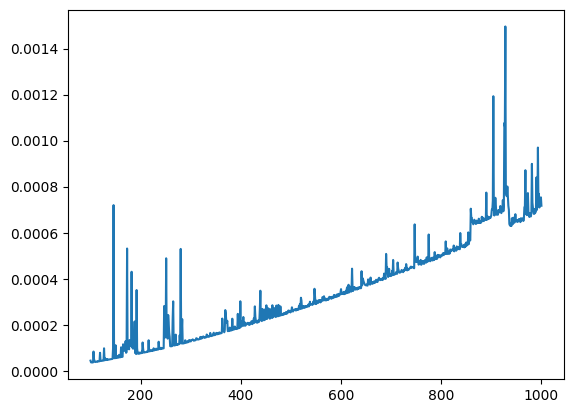

In [8]:
# Temps d'exécution pour le meilleur des cas

times_best = []
for n in list_sizes:
    # liste triée
    l_best = list(range(n))
    t = time.monotonic()
    r = insertion_sort(l_best)
    times_best.append(time.monotonic() - t)

plt.plot(list_sizes, times_best, label="Meilleur cas")

**Analyse**

Alors que la complexité est linéaire (i.e. proportionnelle à la taille de la liste) le temps d'exécution semble _parabolique_ avec des aberrations/pics probablement liés à la charge de l'environnement d'exécution.

### Pire cas - Temps d'exécution

Le pire des cas est celui où la liste est triée de manière inverse.

On affichera également le meilleur des cas par comparaisons.

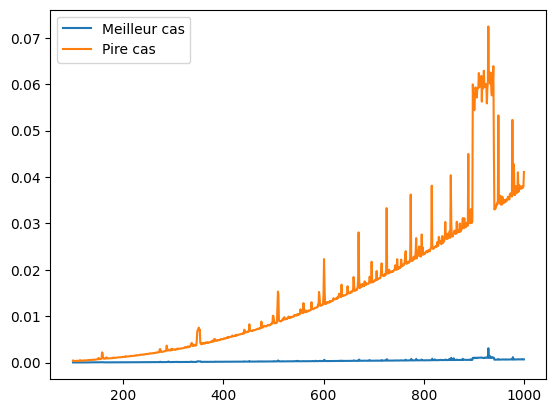

In [10]:
# Temps d'exécution pour le pires des cas
times_best = []
times_worst = []
for n in list_sizes:
    # Meilleur cas (déjà trié)
    l_best = list(range(n))
    t = time.monotonic()
    r = insertion_sort(l_best)
    times_best.append(time.monotonic() - t)
    # Pire cas (trié à l'envers)
    l_worst = list(range(n-1, -1, -1))
    t = time.monotonic()
    r = insertion_sort(l_worst)
    times_worst.append(time.monotonic() - t)

plt.plot(list_sizes, times_best, label="Meilleur cas")
plt.plot(list_sizes, times_worst, label="Pire cas")
plt.legend()


**Analyse**

La courbe semble suivre une tendance parabolique

### Meilleur cas - Nombre de comparaisons

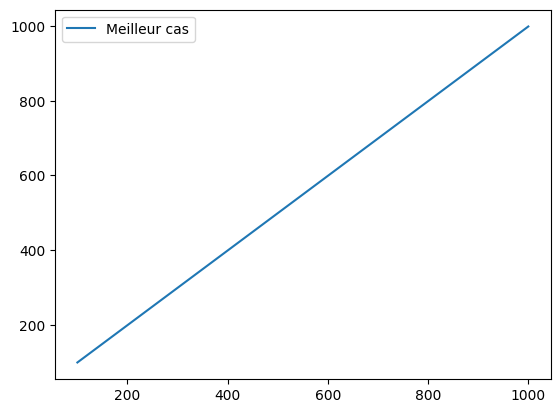

In [11]:
# Nombre de comparaisons meilleur cas
cmps_best = []
for n in list_sizes:
    l_best = list(range(n))
    r = insertion_sort(l_best)
    cmps_best.append(r["cmp"])
plt.plot(list_sizes, cmps_best, label="Meilleur cas")
plt.legend()

**Analyse**

On constate bien l'ordre linéaire (proportionnel à $n$) de l'algorithme.

### Pire cas - Nombre de comparaisons

ON affiche également les meilleurs cas pour visualiser la différence, la vérité est bien évidemment entre les deux…

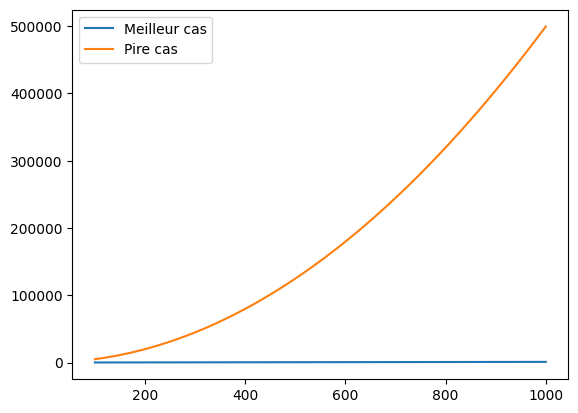

In [12]:
# Pire cas - Nombre de comparaisons
cmps_best = []
cmps_worst = []
for n in list_sizes:
    l_best = list(range(n))
    r = insertion_sort(l_best)
    cmps_best.append(r["cmp"])

    l_worst = list(range(n-1, -1, -1))
    r = insertion_sort(l_worst)
    cmps_worst.append(r["cmp"])

plt.plot(list_sizes, cmps_best, label="Meilleur cas")
plt.plot(list_sizes, cmps_worst, label="Pire cas")
plt.legend()

**Analyse**

La courbe correspond bien à la théorie : $n^2 / 2$

### Listes aléatoires - Temps d'exécution

<ErrorbarContainer object of 3 artists>

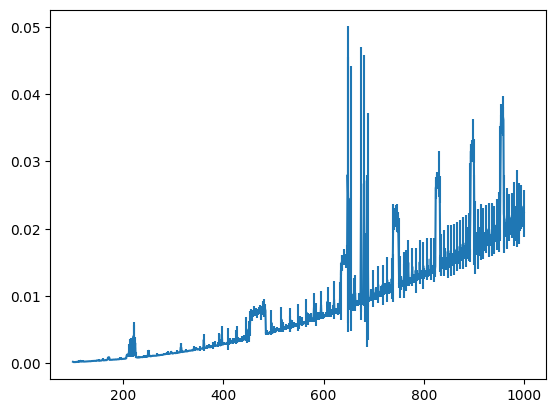

In [13]:
# Listes aléatoires - Temps d'exécution

# Moyennes des temps d'exécution pour chaque taille
times = []
# Ecart-type des temps d'exécution pour chaque taille
errs = []
for n in list_sizes:
    sample = []
    for i in range(sample_size):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        t = time.monotonic()
        insertion_sort(l)
        sample.append(time.monotonic() - t)
    times.append(statistics.mean(sample))
    errs.append(statistics.stdev(sample))

plt.errorbar(list_sizes, times, yerr=errs, label="Écart-type")

**Analyse**

La courbe de base est clairement parabolique.

### Listes aléatoires - Nombre de comparaisons

<ErrorbarContainer object of 3 artists>

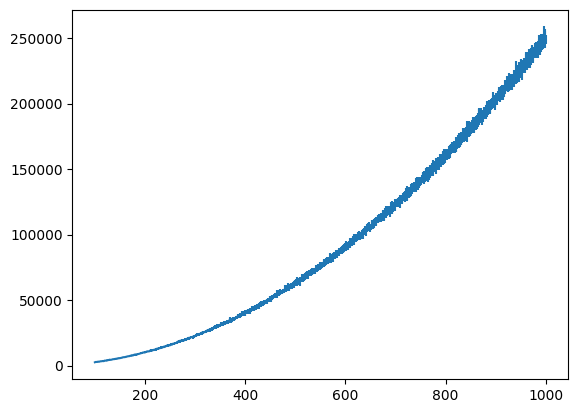

In [16]:
# Listes aléatoires - Nombre de comparaisons

# Moyennes du nombre de comparaisons
cmps = []
# Ecart-type
errs = []
for n in list_sizes:
    sample = []
    for i in range(sample_size):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        r = insertion_sort(l)
        sample.append(r["cmp"])
    cmps.append(statistics.mean(sample))
    errs.append(statistics.stdev(sample))

plt.errorbar(list_sizes, cmps, yerr=errs, label="Écart-type")

**Analyse**

On distingue clairement la parabole $n^2 / 4$ sans les aberrations que l'on constate sur le temps d'exécutions (liées à l'environnement).

La variabilité (écart-type) augmente avec le nombre d'échantillons.

## 4. Variante
Pour insérer l'élément dans la liste ordonnée, on pourrait utiliser la recherche dichotomique pour trouver à quel index insérer l'élément, puis réaliser le décalage.
- implémentez une fonction binarySearchIndex(l,end,v) où l est la liste, end est l'indice tel que la sous liste l[0:end] est triée, et v est l'élément à insérer et qui retourne l'index où insérer v (i.e. un entier entre 0 et end+1)
- Implémentez une fonction insertionSortBS(l) qui utilise cette idée
- Comparez le temps d'exécution de manière expérimentale. Du point de vue théorique, qu'est-ce qu'on attend?
- Comparez le nombre de comparaisons entre l'algorithme standard et cette variante

### Méthode

1. Liste cible **I** = [0 : end+1]
2. Si len(**I**) == 1, solution trouvée
3. Sinon :
    1. Divison de I en 2 sous-listes non vides (donc de longueur inférieure à    celle de **I**)
    2. **I** = Sous-liste cible
    3. Goto 2

In [17]:
# RECHERCHE D'EMPLACEMENT PAR DICHOTOMIE

# Arguments
#   l   : liste
#   end : index du dernier élément positionné
#   v   : valeur de l'élément à positionner
# Résultat
#   index : position (entre 0 et end+1) de l'élément de valeur
#   cmp   : nombre de comparaisons effectuées
def binarySearchIndex(l: list[int], end: int, v: int) -> dict[str, int]:
    # Nombre de comparaisons
    cmp = 0
    # [s:e] est la liste cible
    s = 0
    e = end + 1
    while s < e:
        # Partie entière du milieu de l'intervalle (m < e, donc m ≤ end, donc l[m] existe)
        m = (s+e) // 2
        cmp += 1
        # On teste '<' pour un algorithme stable
        if v < l[m]:
            # l'indice de v est dans [s:m]
            e = m
        else:
            # L'indice de v est dans [m+1:e]
            s = m + 1
    return {"index": s, "cmp": cmp}

def insertion_sort_binary(A):
    aff = 0
    cmp = 0
    for k in range(1, len(A)):
        r = binarySearchIndex(A, k-1, A[k])
        cmp += r["cmp"]
        aff +=2
        A.insert(r["index"], A.pop(k))

    return {
        "cmp": cmp,
        "aff": aff
    }

In [18]:
print("insertion_sort_binary()")
lists = [ [], [1], [1,2,3,4,5], [5,4,3,2,1], [5,2,4,1,3] ]
for L in lists:
    print(L, end=" -> ")
    insertion_sort_binary(L)
    print(L)

insertion_sort_binary()
[] -> []
[1] -> [1]
[1, 2, 3, 4, 5] -> [1, 2, 3, 4, 5]
[5, 4, 3, 2, 1] -> [1, 2, 3, 4, 5]
[5, 2, 4, 1, 3] -> [1, 2, 3, 4, 5]


### Séquentiel vs. dichotomie - Temps d'exécution

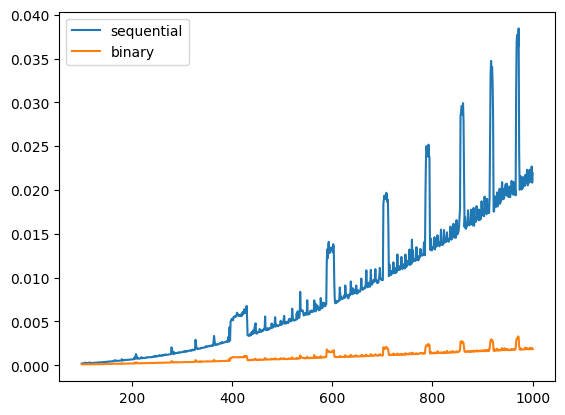

In [19]:
# Comparaison des temps d'exécution pour des listes aléatoires
times = []
times_binary = []
for n in list_sizes:
    sample = []
    sample_binary = []
    for i in range(sample_size):
        l = [random.randint(0, int(1e6)) for _ in range(n)]

        l_copy = l.copy()
        t = time.monotonic()
        insertion_sort(l_copy)
        sample.append(time.monotonic() - t)

        t = time.monotonic()
        insertion_sort_binary(l)
        sample_binary.append(time.monotonic() - t)
    times.append(statistics.mean(sample))
    times_binary.append(statistics.mean(sample_binary))

plt.plot(list_sizes, times, label="sequential")
plt.plot(list_sizes, times_binary, label="binary")
plt.legend()

**Analyse**

On constate des temps moyens d'exécution nettement inférieurs.

### Comparaisons séquentiel vs. dichotomie - Nombre de comparaisons

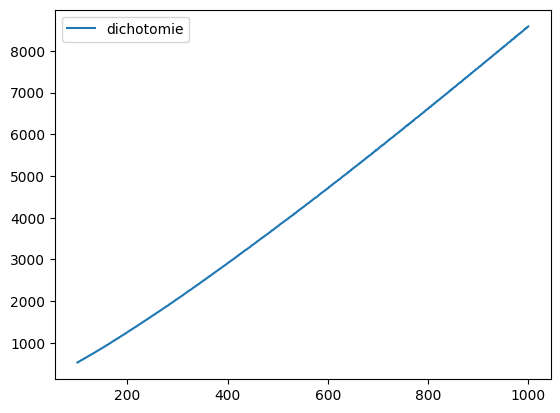

In [22]:
# Dichotomie - Nombre de comparaisons pour des listes aléatoires
cmps_binary = []
for n in list_sizes:
    sample_binary = []
    for i in range(sample_size):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        r = insertion_sort_binary(l)
        sample_binary.append(r["cmp"])
    cmps_binary.append(statistics.mean(sample_binary))

plt.plot(list_sizes, cmps_binary, label="dichotomie")
plt.legend()

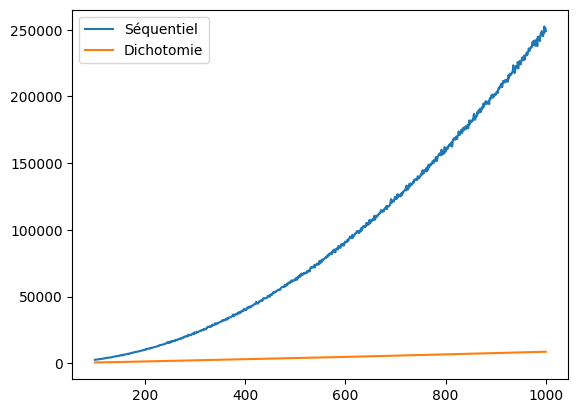

In [23]:
# Séquentiel vs. Dichotomie - Comparaison du nombre de comparaisons pour des listes aléatoires
cmps = []
cmps_binary = []
for n in list_sizes:
    sample = []
    sample_binary = []
    for i in range(10):
        l = [random.randint(0, int(1e6)) for _ in range(n)]
        l_copy = l.copy()
        r = insertion_sort(l_copy)
        sample.append(r["cmp"])
        r = insertion_sort_binary(l)
        sample_binary.append(r["cmp"])

    cmps.append(statistics.mean(sample))
    cmps_binary.append(statistics.mean(sample_binary))

plt.plot(list_sizes, cmps, label="Séquentiel")
plt.plot(list_sizes, cmps_binary, label="Dichotomie")
plt.legend()

**Analyse**

Pour le premier algorithme, on effectue en moyenne $k/2$ comparaisons au niveau $k$, le nombre total moyen de comparaisons est donc en $N^2/4$, ce qui correspond à la courbe ci-dessous.

Dans la recherche par dichotomie, il faut $log_{2}(k)$ comparaisons pour arriver à un intervalle de largeur 1 ($k/2^c = 1$). Le nombre total de comparaisons est donc $\sum_{k=1}^{N} log_{2}(k) = log_{2}(N!)$.

Or:

$
\frac{log_{2}(N!)}{N^2/4} < 4\frac{log_{2}(N^N)}{N^2} = 4\frac{log_{2}(N)}{N}
$

Qui tend vers 0 quand $N$ tend vers l'infini : plus les échantillons sont grands, plus la recherche par dichotomie est efficace.